<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import requests
import numpy as np
import apimoex
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [2]:
stock_quotes = ['GAZP', 'YNDX', 'RUAL', 'IRAO', 'GMKN', 'LKOH', 'MGNT', 'MTSS', 'NVTK', 'PLZL', 'ROSN', 'SBER',
               'SNGS', 'TATN','CHMF']

In [3]:
df = pd.DataFrame({"Date": pd.date_range(start='2015-03-30', freq='1h', end=date.today())})

In [4]:
df

,Date
0,2015-03-30 00:00:00
1,2015-03-30 01:00:00
2,2015-03-30 02:00:00
3,2015-03-30 03:00:00
4,2015-03-30 04:00:00
...,...
76604,2023-12-24 20:00:00
76605,2023-12-24 21:00:00
76606,2023-12-24 22:00:00
76607,2023-12-24 23:00:00


In [5]:
with requests.Session() as session:
    for elem in stock_quotes:
        data = apimoex.get_board_candles(session, elem, interval=60)
        data = pd.DataFrame(data)
        data.rename(columns = {'close':elem}, inplace = True)
        data['begin'] = pd.to_datetime(data['begin'])
        data = data[data['begin'] >= '2015-03-30 00:00:00' ]
        df = df.merge(data[[elem, 'begin']], left_on='Date', right_on='begin', how='outer')
        df = df.drop('begin', axis=1)

In [6]:
df = df.dropna()
df

,Date,GAZP,YNDX,RUAL,IRAO,GMKN,LKOH,MGNT,MTSS,NVTK,PLZL,ROSN,SBER,SNGS,TATN,CHMF
10,2015-03-30 10:00:00,136.73,896.0,37.150,0.9379,10159.0,2622.9,11300.0,244.60,422.0,1050.5,241.50,61.54,35.450,273.30,661.90
11,2015-03-30 11:00:00,136.04,889.0,37.300,0.9399,10210.0,2625.0,11214.0,244.40,422.2,1049.5,243.55,62.04,35.450,276.65,661.80
12,2015-03-30 12:00:00,136.42,889.0,37.340,0.9650,10229.0,2640.4,11179.0,244.20,422.5,1038.0,243.50,62.74,35.415,274.95,660.65
13,2015-03-30 13:00:00,136.11,892.0,37.340,0.9600,10232.0,2639.8,11200.0,244.20,422.2,1031.0,243.40,62.24,35.270,274.80,658.75
14,2015-03-30 14:00:00,135.84,893.0,37.340,0.9677,10262.0,2625.2,11166.0,244.35,422.4,1031.5,243.75,62.10,35.330,274.80,654.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76555,2023-12-22 19:00:00,162.19,2292.0,34.700,3.9950,17102.0,6741.5,6663.0,249.90,1490.6,10583.5,582.80,271.09,27.660,661.80,1334.00
76556,2023-12-22 20:00:00,162.30,2293.0,34.745,3.9915,17106.0,6742.0,6667.5,249.60,1489.6,10562.5,582.30,270.92,27.655,662.00,1333.40
76557,2023-12-22 21:00:00,162.10,2291.4,34.770,3.9900,17096.0,6727.0,6665.5,249.55,1490.6,10570.0,582.65,270.63,27.660,661.90,1329.20
76558,2023-12-22 22:00:00,162.16,2291.8,34.695,3.9905,17100.0,6731.0,6668.5,249.70,1489.2,10568.5,582.50,270.96,27.635,661.50,1333.60


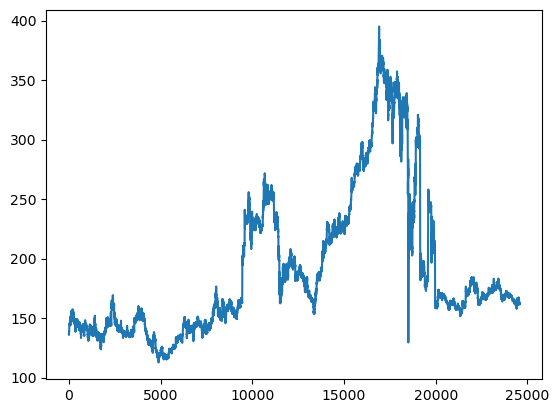

In [7]:
plt.plot(list(df['GAZP']));

In [8]:
df.to_csv("fin_quotes_per_hour.csv", index=False)